In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,scale
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, recall_score, precision_score
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

import seaborn as sns
import math

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [48]:


raw_data = pd.read_csv('Heart2.csv')
print(raw_data.head(2))
unique_values = raw_data['Medications'].unique()


print(unique_values)


print(len(unique_values))
drug_lists = raw_data['Medications'].str.split(', ')

df = raw_data

drug_lists = df['Medications'].str.split(', ')

for drug in drug_lists.explode().unique():
    if drug:
        col_name = 'used_' + drug.lower().replace(' ', '_')
        df[col_name] = drug_lists.apply(lambda x: 1 if drug in x else 0)

df.to_csv('new_data.csv', index=False)

   Gender  Age  Chest pain  Shortness of breath  Fatigue  Systolic  Diastolic  \
0  Female   55           1                    1        1       140         90   
1    Male   57           1                    1        1       150         80   

   Heart rate (bpm)  Lung sounds  Cholesterol level (mg/dL)  ...  \
0               100            1                        220  ...   
1               110            1                        210  ...   

                                          Cardiac CT  Obesity  Murmur  \
0  Shows a 50% blockage in the left anterior desc...        0       1   
1  Shows a 60% blockage in the right coronary artery        0       1   

   Chest x-ray  Previous illnesses  Pulmonary function tests  Spirometry  \
0         None                None                      None        None   
1         None                None                      None        None   

   Heart Disease                        Medications  \
0              1  Aspirin, metoprolol, atorvast

In [45]:



all_drugs = ','.join(raw_data['Medications'].tolist())

drug_list = all_drugs.split(', ')


num_unique_drugs = len(set(drug_list))


print('There are', num_unique_drugs, 'unique drugs in the column.')

There are 123 unique drugs in the column.


0      1
1      0
2      1
3      0
4      0
      ..
329    1
330    0
331    0
332    0
333    0
Name: Heart Disease, Length: 334, dtype: int32


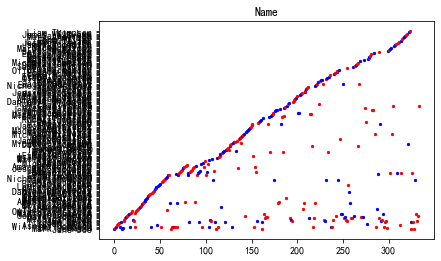

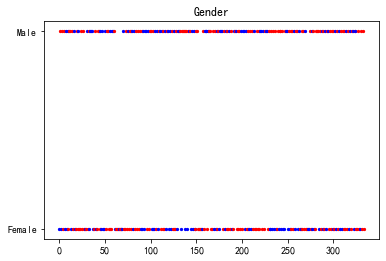

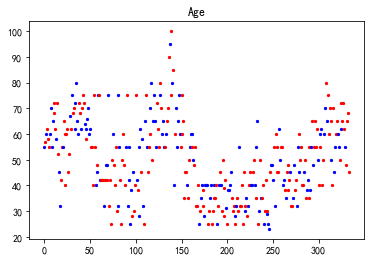

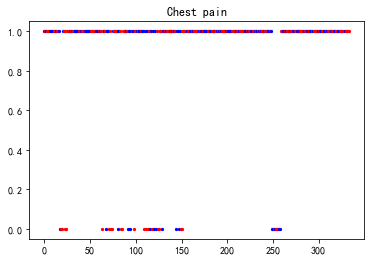

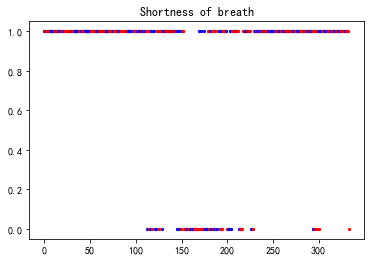

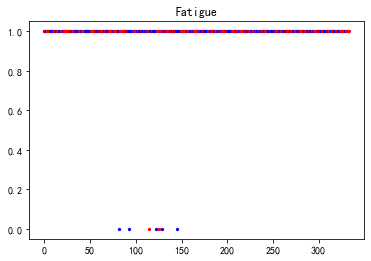

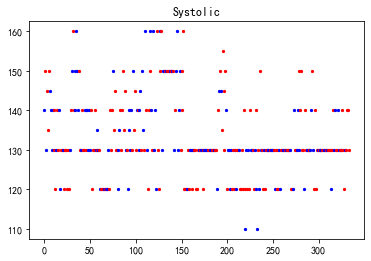

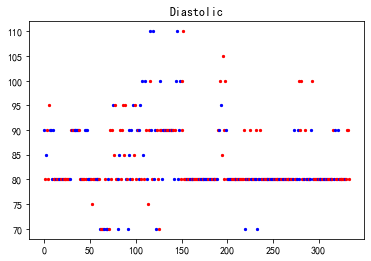

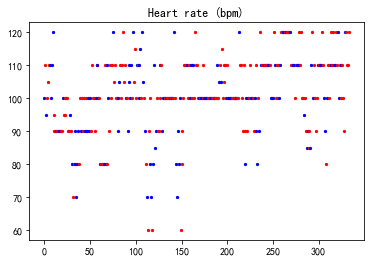

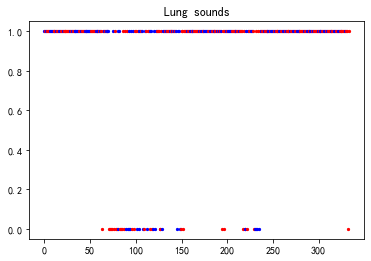

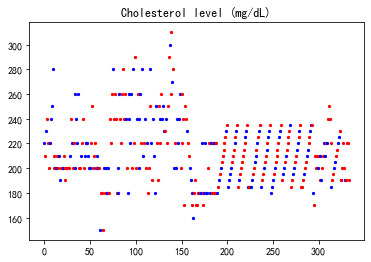

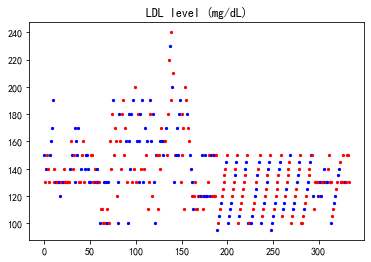

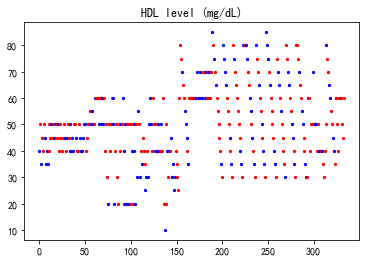

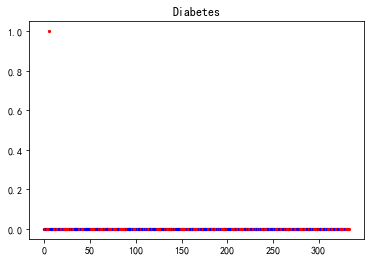

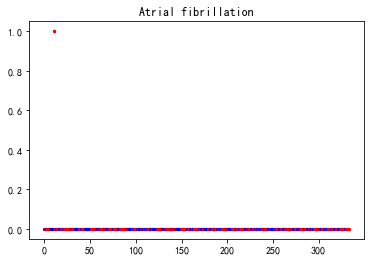

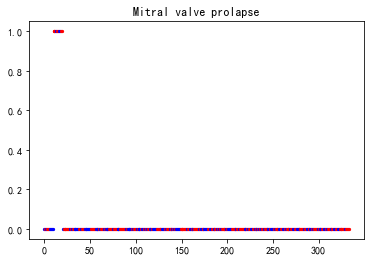

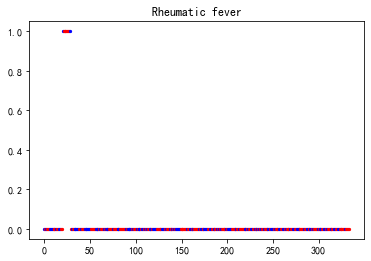

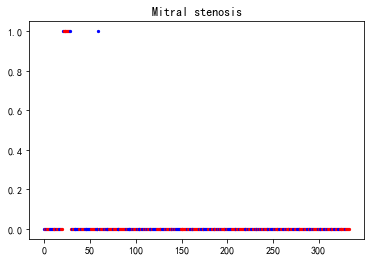

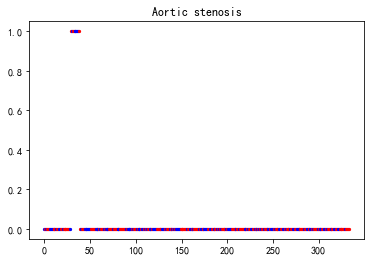

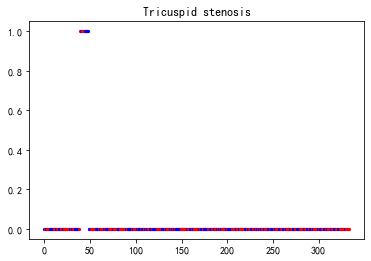

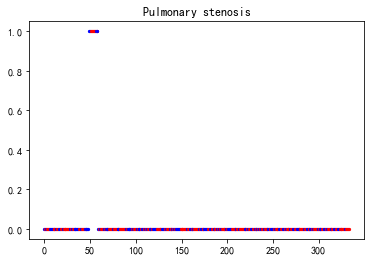

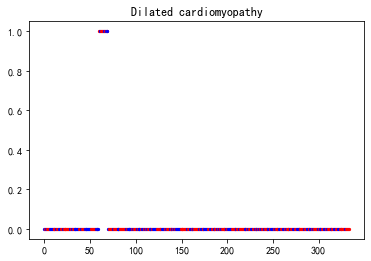

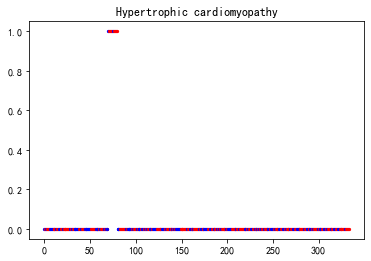

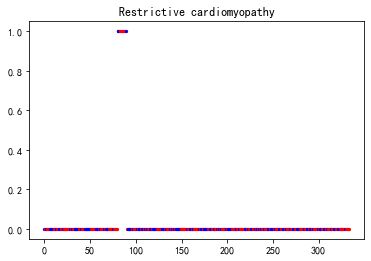

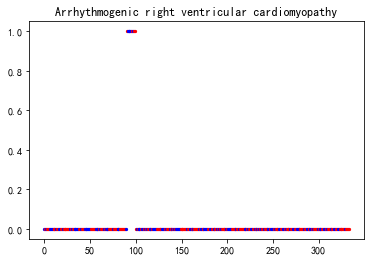

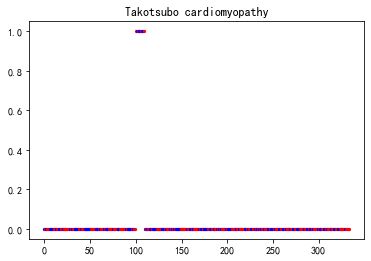

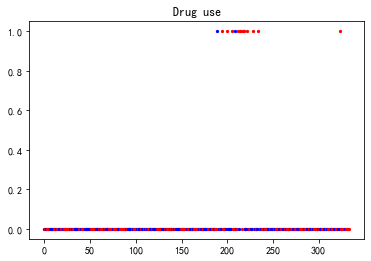

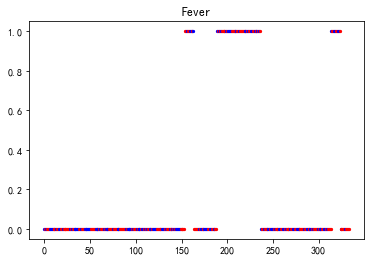

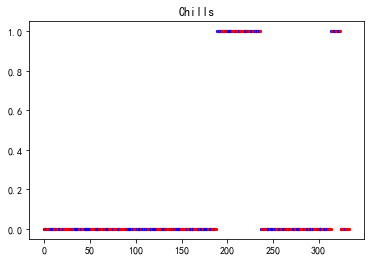

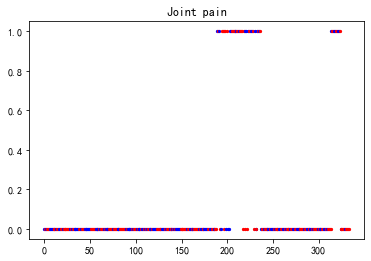

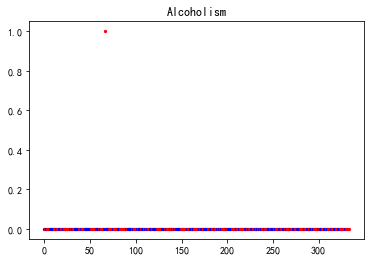

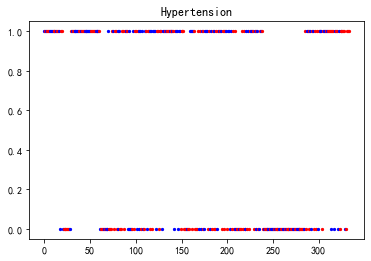

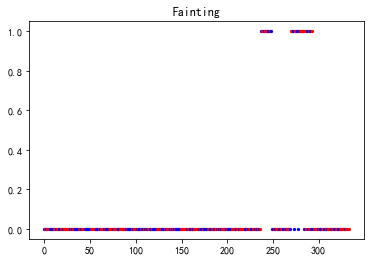

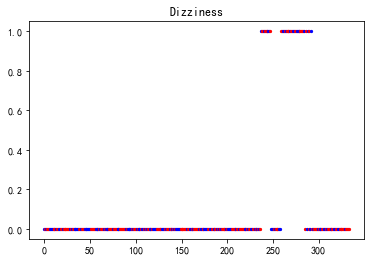

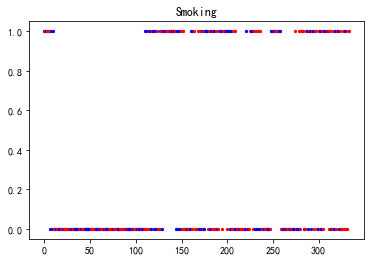

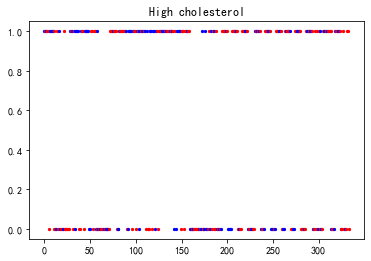

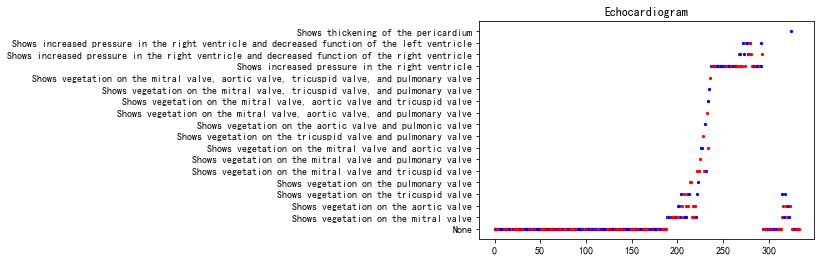

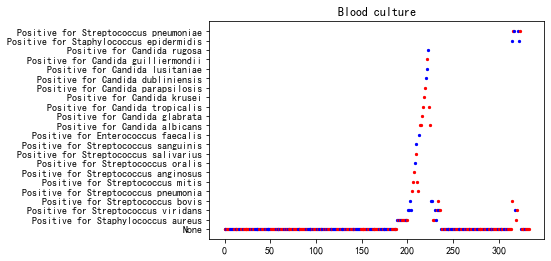

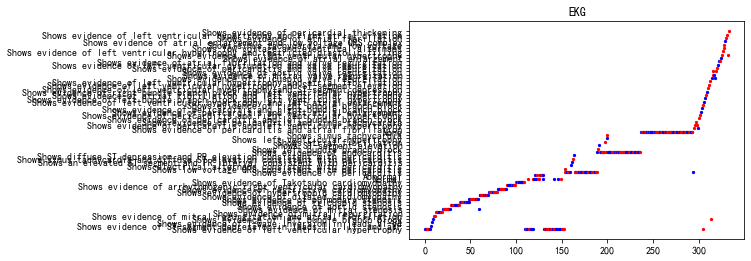

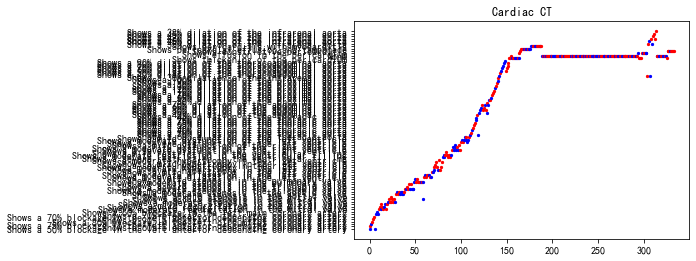

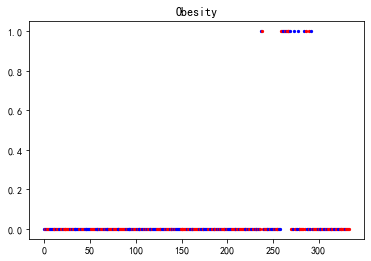

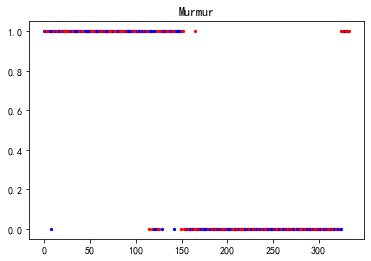

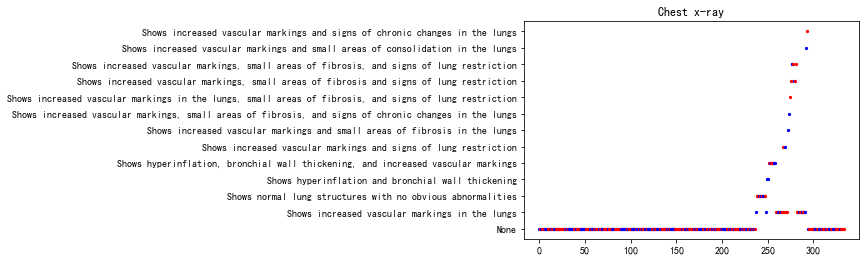

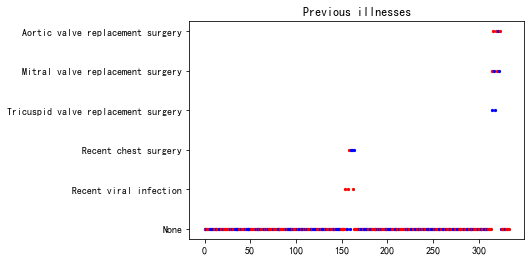

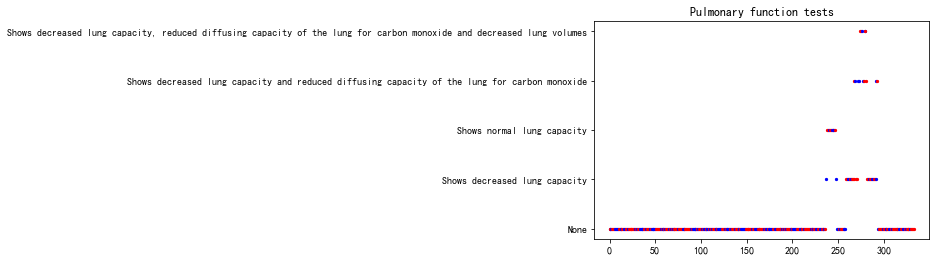

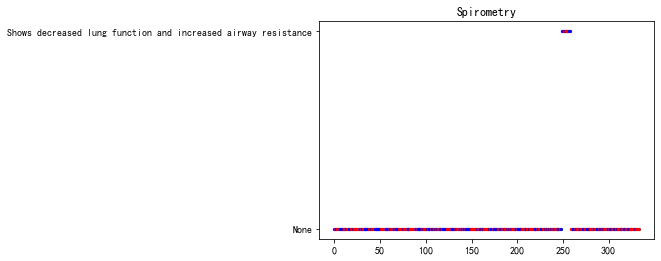

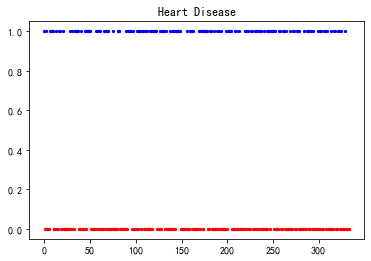

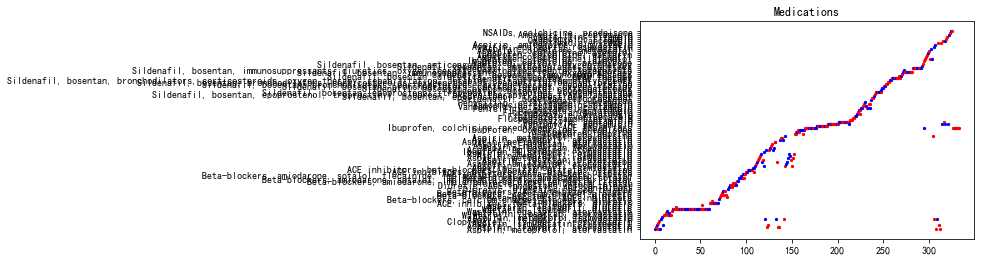

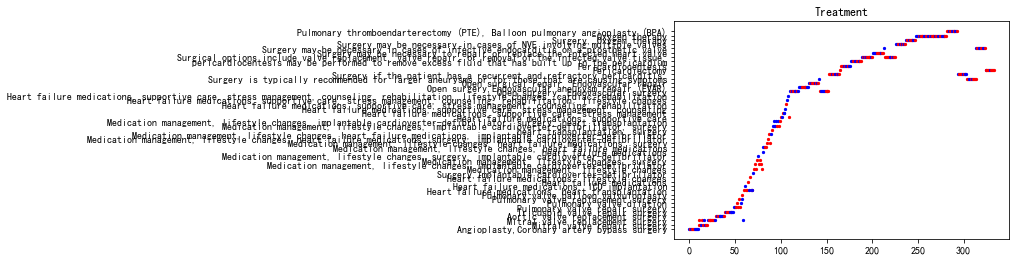

In [13]:

raw_data['Heart Disease']=raw_data['Heart Disease'].astype(int)
print(raw_data['Heart Disease'])
for i in raw_data.columns:
    x=0
    for j in raw_data[i]:

        if raw_data['Heart Disease'].iloc[x] == int(1):
            plt.scatter(x,j,color='b',s=5)
        else:
            plt.scatter(x, j, color='r',s=5)
        x = x+1
    
    plt.title(i)
    plt.show()

In [16]:
age_distDf = pd.DataFrame()


age_distDf['age_range']  = pd.cut(x = raw_data['Age'],
                                  bins = [0,18,40,60,100],
                                  include_lowest = True,right=False,
                                  labels = ['children','youth','middle age','seniors'])


age_distDf = pd.concat([age_distDf['age_range'],raw_data['Heart Disease']],axis=1)
age_distDf.head()

,age_range,Heart Disease
0,middle age,1
1,middle age,0
2,seniors,1
3,seniors,0
4,middle age,0


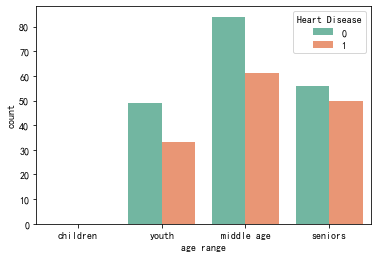

In [17]:
sns.countplot(data=age_distDf,x='age_range',hue='Heart Disease',palette='Set2')
plt.xlabel('age range')
plt.show()

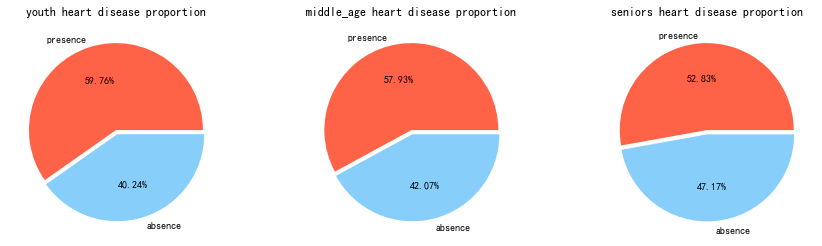

In [20]:
colors=['tomato','lightskyblue']
plt.figure(figsize = (3*5,1*4))


ax1 = plt.subplot(1,3,1)
youth =  age_distDf[age_distDf['age_range']=='youth']['Heart Disease'].value_counts()
plt.pie(youth,explode=[0,0.05],autopct='%.2f%%',labels=['presence','absence'],colors=colors)
plt.title('youth heart disease proportion')


ax2 =  plt.subplot(1,3,2)
middle = age_distDf[age_distDf['age_range']=='middle age']['Heart Disease'].value_counts()
plt.pie(middle,explode=(0,0.05),autopct='%.2f%%',labels=['presence','absence'],colors=colors)
plt.title('middle_age heart disease proportion')


ax2 = plt.subplot(1,3,3)
old =  age_distDf[age_distDf['age_range']=='seniors']['Heart Disease'].value_counts()
plt.pie(old,explode=[0,0.05],autopct='%.2f%%',labels=['presence','absence'],colors=colors)
plt.title('seniors heart disease proportion')
plt.show()

# gender


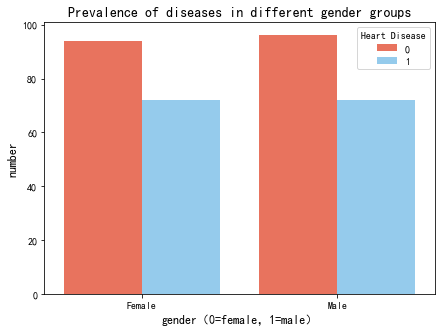

In [23]:
sexDf = raw_data[['Gender','Heart Disease']]
plt.figure(figsize=(7,5))
sns.countplot(data = sexDf,x = 'Gender',hue='Heart Disease',palette=colors)
plt.title('Prevalence of diseases in different gender groups',fontsize=14)
plt.xlabel('gender（0=female，1=male）',fontsize=12)
plt.ylabel('number',fontsize=12)
plt.show()

# Echocardiogram

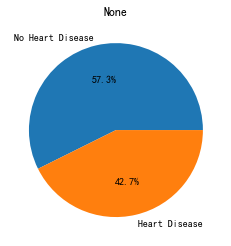

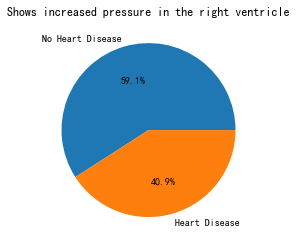

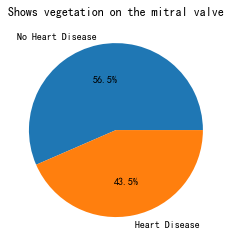

In [27]:



top_3 = raw_data["Echocardiogram"].value_counts().nlargest(3).index.tolist()


top_3_data = raw_data[raw_data["Echocardiogram"].isin(top_3)]


for description in top_3:

    df = top_3_data[top_3_data["Echocardiogram"] == description]["Heart Disease"].value_counts()
    

    plt.pie(df, labels=["No Heart Disease", "Heart Disease"], autopct="%1.1f%%")
    plt.title(description)
    plt.show()


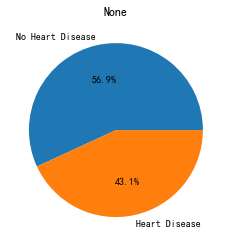

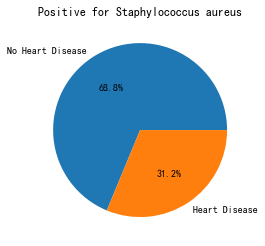

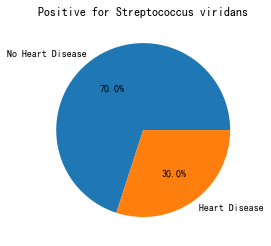

In [39]:

top_3bc = raw_data["Blood culture"].value_counts().nlargest(3).index.tolist()


top_3_databc = raw_data[raw_data["Blood culture"].isin(top_3bc)]


for description in top_3bc:

    df = top_3_databc[top_3_databc["Blood culture"] == description]["Heart Disease"].value_counts()
    
    
    plt.pie(df, labels=["No Heart Disease", "Heart Disease"], autopct="%1.1f%%")
    plt.title(description)
    plt.show()


KeyError: 0

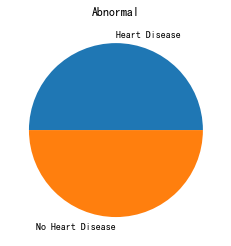

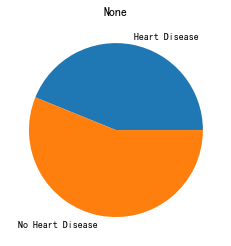

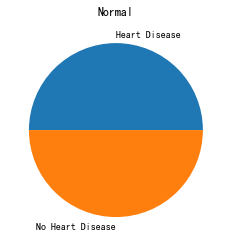